
# **1 .Data Understanding and Preprocessing:**

Load the dataset and provide a summary of its structure (number of rows, columns, data types, and missing values).
Perform data cleaning:
Handle missing values appropriately.
Convert data types if necessary.
Create any new features you think might be useful.


In [3]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
 #loading data
 data=pd.read_csv('/content/hotel_bookings.csv')

In [5]:
#summary of dataset

#rows and columns
no_of_rows=data.shape[0]
no_of_columns=data.shape[1]
print(f'No of rows in dataset: {no_of_rows}')
print(f'No of columns in dataset: {no_of_columns}')

#data types
print('------------------------------------------')
print('Columns and its datatypes')
data.dtypes

No of rows in dataset: 119390
No of columns in dataset: 32
------------------------------------------
Columns and its datatypes


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           float64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
reservation_status                 object
reservation_status_date            object
dtype: object

In [6]:
#missing values in dataset
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
dtype: int64

**We can see only four column has missing values.**  

1.    children	4
2.    country:	488
3.    agent:	16340
4.    company:	112593

In [7]:
#Filling the missing values
data['children'].fillna(data['children'].mode().values[0],inplace=True)
data['country'].fillna(data['country'].mode().values[0],inplace=True)
data['agent'].fillna(data['agent'].mode().values[0],inplace=True)
data['company'].fillna('Unknown',inplace=True)

In [8]:
#total null values
data.isnull().sum().sum()

0

In [9]:
#binning and coverting data type
def mapping(x):
  if x>=5:
    x=-1
  return x

#mapping adult values according to member and converting data type as category
data['adults']=data['adults'].apply(mapping)
mapping={2:'two_adults',1:'one_adult',3:'three_adult',0:'None',4:'four_adult',-1:'Many'}
data['adults']=data['adults'].map(mapping)
data['adults']=data['adults'].astype('category')

#binning children and converting data type
binning_children=[-1,0,2,10]
group_children=['None','Few','Many']
data['children']=pd.cut(data['children'],binning_children,labels=group_children)
data['children']=data['children'].astype('category')

#binning babies and converting data type
binning=[-1,0,2,10]
group_babies=['None','Few','Many']
data['babies']=pd.cut(data['babies'],binning,labels=group_babies)
data['babies']=data['babies'].astype('category')


In [10]:
#categroy of country and new features as continent
# !pip install pycountry
# !pip install pycountry_convert
import pycountry
import pycountry_convert as cc

#convert country code to continent
def get_continent_name(country_code):
    try:
        country = pycountry.countries.get(alpha_3=country_code)
        continent_code = cc.country_alpha2_to_continent_code(country.alpha_2)
        continent_name = cc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None

#added new column as continent
data['continent']=data['country'].apply(lambda x:get_continent_name(x))
data['continent']=data['continent'].astype('category')

In [11]:
#binning the country as per their counts

#dictionary of country and its counts
country_count=data['country'].value_counts().to_dict()

#mapping function on the basis of counts
def mapping_country(x):
  a=country_count.get(x,None)
  result=''
  if a is not None:
    if a >= 10000:
      result = 'Tier 1'
    elif 2000 <= a < 10000:
      result = 'Tier 2'
    elif 200 <= a < 2000:
      result = 'Tier 3'
    else:
      result = 'Tier 4'

  return result


data['country']=data['country'].apply(mapping_country)

#country type and it counts
data['country'].value_counts()

data['country']=data['country'].astype('category')

In [12]:
#columns
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'continent'],
      dtype='object')

In [13]:
#converting datatype
data['hotel']=data['hotel'].astype('category')
data['is_canceled']=data['is_canceled'].astype('category')
data['arrival_date_year']=data['arrival_date_year'].astype('category')
data['arrival_date_month']=data['arrival_date_month'].astype('category')

data['arrival_date_week_number']=data['arrival_date_week_number'].astype('category')
data['arrival_date_day_of_month']=data['arrival_date_day_of_month'].astype('category')
binning=[-1,0,2,19]
groups=['None','Few','Many']
data['stays_in_weekend_nights']=pd.cut(data['stays_in_weekend_nights'],binning,labels=groups)
data['stays_in_weekend_nights']=data['stays_in_weekend_nights'].astype('category')
data['stays_in_week_nights'].value_counts()
binning=[-1,0,3,10,20,41]
groups=['None','Few','Several','Many','Frequent']
data['stays_in_week_nights']=pd.cut(data['stays_in_week_nights'],binning,labels=groups)
data['stays_in_week_nights']=data['stays_in_week_nights'].astype('category')
data['meal']=data['meal'].astype('category')
data['market_segment']=data['market_segment'].astype('category')
data['distribution_channel']=data['distribution_channel'].astype('category')
data['is_repeated_guest']=data['is_repeated_guest'].astype('category')


binning=[-1,0,6,72]
groups=['None','Few','Frequent']
data['previous_bookings_not_canceled']=pd.cut(data['previous_bookings_not_canceled'],binning,labels=groups)
data['previous_bookings_not_canceled']=data['previous_bookings_not_canceled'].astype('category')
data['previous_bookings_not_canceled']=data['previous_bookings_not_canceled'].astype('category')
data['reserved_room_type']=data['reserved_room_type'].astype('category')
data['assigned_room_type']=data['assigned_room_type'].astype('category')

binning=[-1,0,5,18]
groups=['None','Few','Many']
data['booking_changes']=pd.cut(data['booking_changes'],binning,labels=groups)

data['booking_changes']=data['booking_changes'].astype('category')
data['deposit_type']=data['deposit_type'].astype('category')


In [14]:
#dictionary of agent and its counts
agent_dict=data['agent'].value_counts().to_dict()
#mapping function on the basis of counts
def mapping_agent(x):
  a=agent_dict.get(x,None)
  result=''
  if a is not None:
    if a >= 15000:
      result = 'Very High'
    elif 2000 <= a < 15000:
      result = 'High'
    elif 300 <= a < 2000:
      result = 'Low'
    else:
      result = 'Very low'

  return result


#binning the agent as per their counts
data['agent']=data['agent'].apply(mapping_agent)

data['agent']=data['agent'].astype('category')
#country type and it counts
data['agent'].value_counts()

agent
Very High    48301
High         34452
Low          23791
Very low     12846
Name: count, dtype: int64

In [15]:
#categorizing the company
def company_known(x):
  result='Unknown'
  if x!='Unknown':
    result='Known'
  return result

data['company']=data['company'].apply(company_known)
data['company']=data['company'].astype('category')
data['customer_type']=data['customer_type'].astype('category')

#converting datatypes
data['required_car_parking_spaces']=data['required_car_parking_spaces'].astype('category')
data['reservation_status']=data['reservation_status'].astype('category')
data['continent']=data['continent'].astype('category')

In [16]:
#converting the status_date into pandas datatime
data['reservation_status_date']=pd.to_datetime(data['reservation_status_date'])

In [17]:
#checking the datatypes
data.dtypes

hotel                                   category
is_canceled                             category
lead_time                                  int64
arrival_date_year                       category
arrival_date_month                      category
arrival_date_week_number                category
arrival_date_day_of_month               category
stays_in_weekend_nights                 category
stays_in_week_nights                    category
adults                                  category
children                                category
babies                                  category
meal                                    category
country                                 category
market_segment                          category
distribution_channel                    category
is_repeated_guest                       category
previous_cancellations                     int64
previous_bookings_not_canceled          category
reserved_room_type                      category
assigned_room_type                      category
booking_changes                         category
deposit_type                            category
agent                                   category
company                                 category
days_in_waiting_list                       int64
customer_type                           category
adr                                      float64
required_car_parking_spaces             category
total_of_special_requests                  int64
reservation_status                      category
reservation_status_date           datetime64[ns]
continent                               category
dtype: object

**2.Exploratory Data Analysis (EDA):**

Provide a detailed EDA including visualizations. Focus on understanding booking trends, customer demographics, and cancellation patterns.
Use visualizations to highlight key insights, such as:
Seasonality in bookings.
Distribution of stays across different hotel types.
Average daily rate (ADR) trends.
Cancellation rates and factors affecting cancellations.

In [18]:
#1.Univariate analysis
list_cat_variables=data.select_dtypes('category')
list_con_variables=data.select_dtypes(['int64','int32'])

**Count plot for each categorical variable so see the proportion of their distribution**

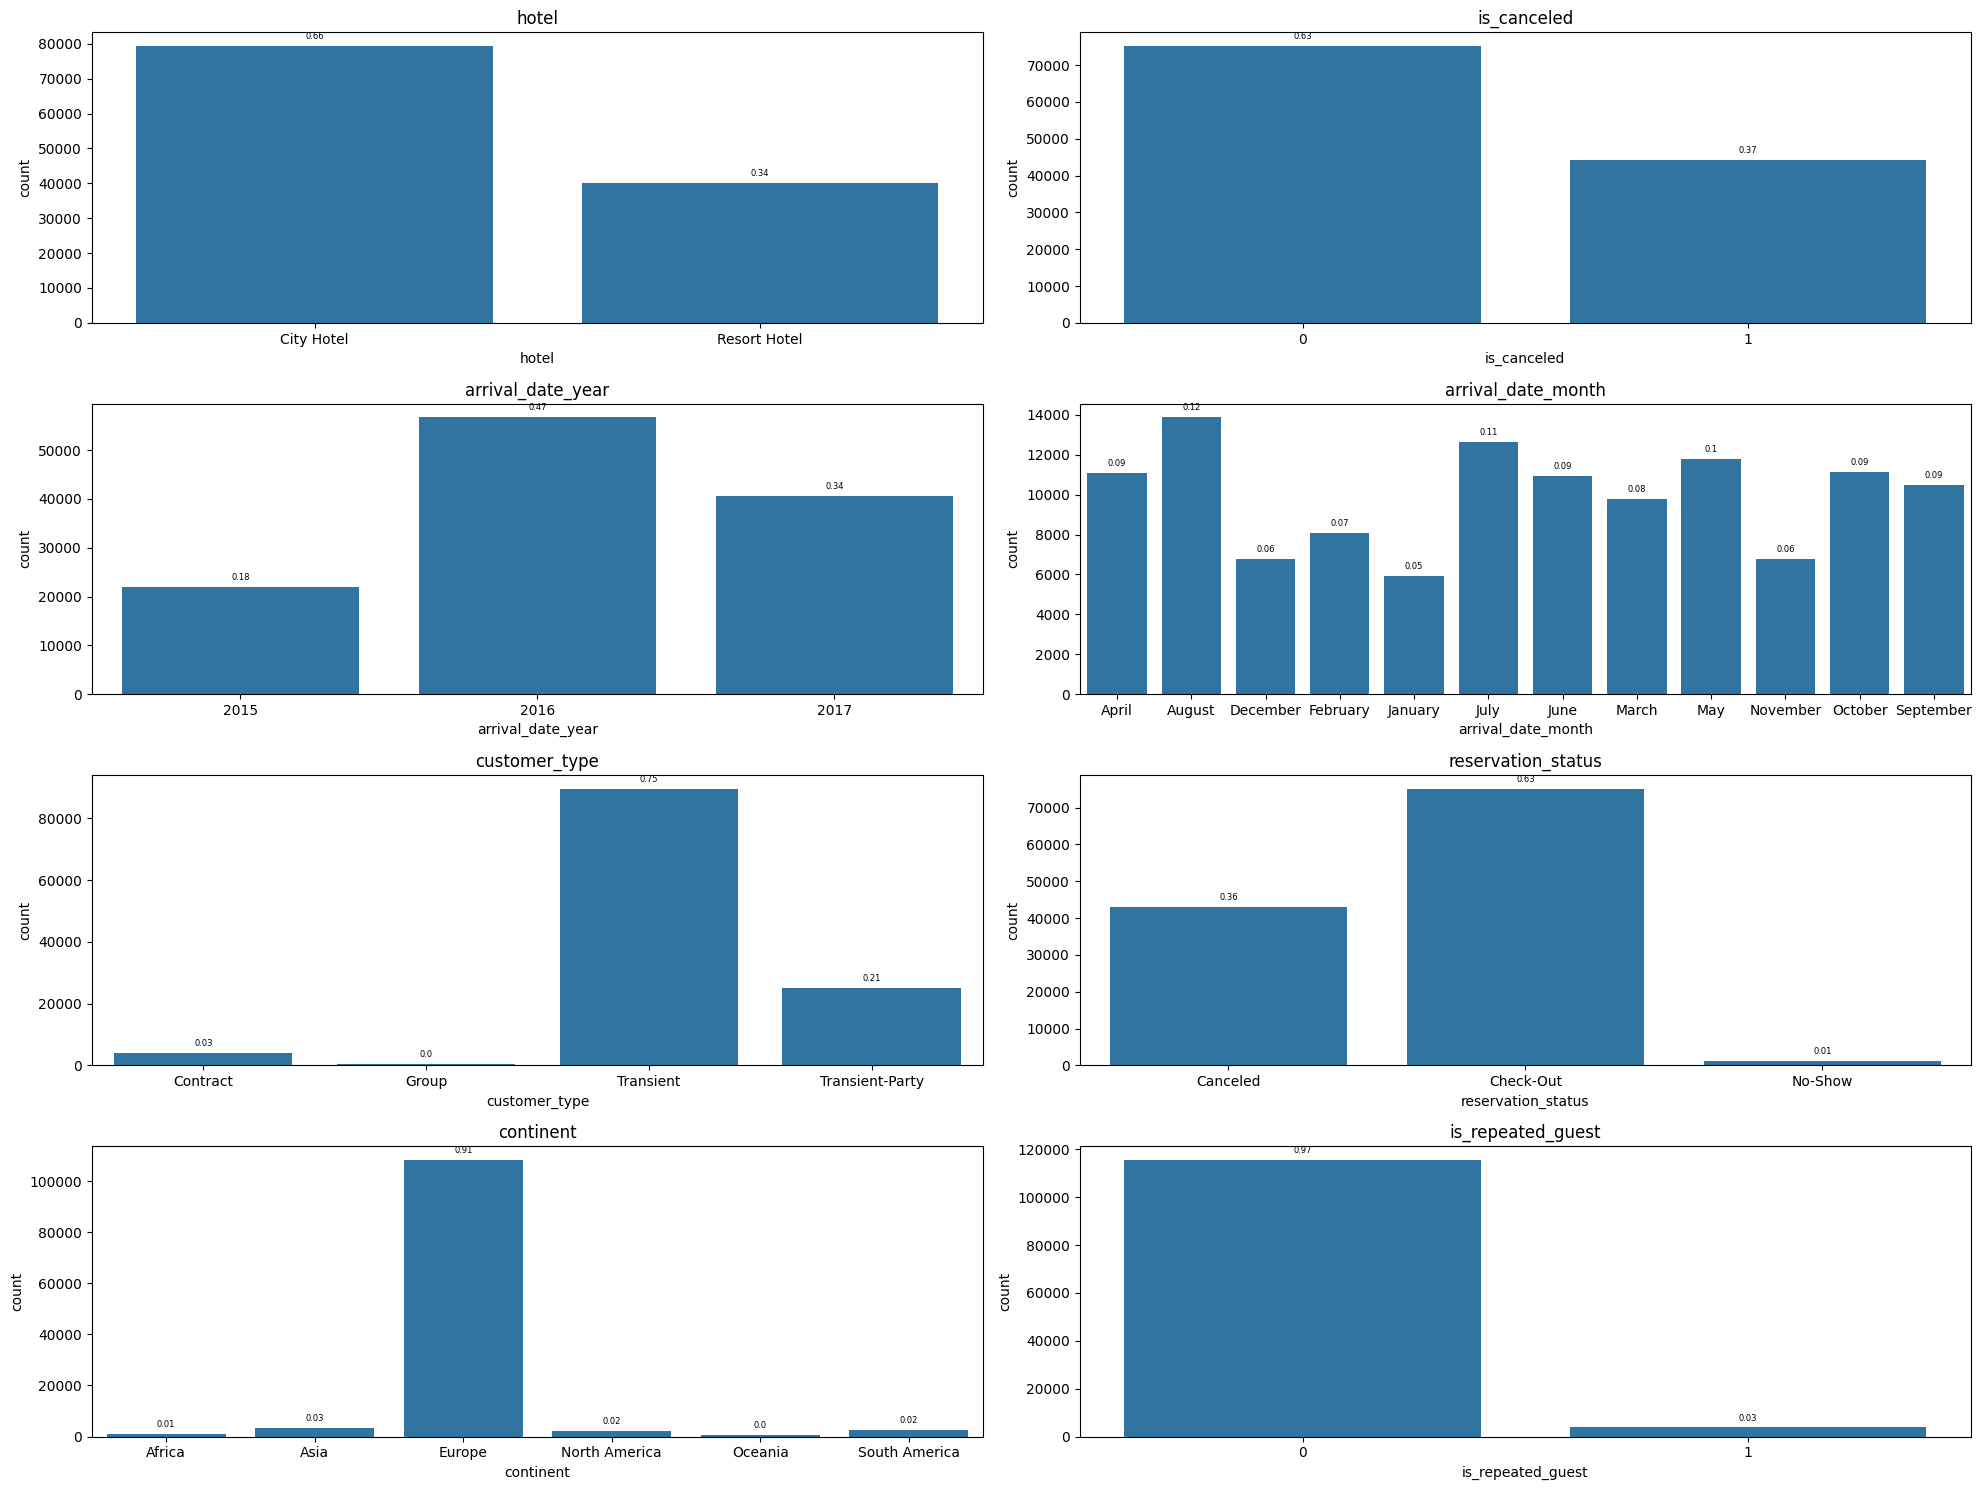

In [19]:
categorical_variables=['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
'customer_type','reservation_status','continent','is_repeated_guest']

# subplots for each categorical variables
fig, axes = plt.subplots(4,2, figsize=(20,15))

# flattening axes array
axes = axes.flatten()

#plot for each variables
for i, var in enumerate(categorical_variables):
    ax = sns.countplot(x=var, data=data, ax=axes[i])

    #adding labels on each
    for p in ax.patches:
        ax.annotate(f'{np.round(p.get_height()/len(data),2)}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline',
                    fontsize=6, color='black', xytext=(0, 5),
                    textcoords='offset points')

    #title and labels
    ax.set_title(f'{var}')
    ax.set_xlabel(var)
    ax.set_ylabel('count')

#showing
plt.tight_layout()
plt.show()

Analysis
1. City hotel have move booking then resort hotel and the percentage is approx 64%
2.Out of all our booking 63 did cancelled and 37 got canceled.
3.Most of the booking was done in 2016 and month was august.
4.75% customer belogs to transient.
5.91% of customer belongs of europe and 97% of customer was new guests.


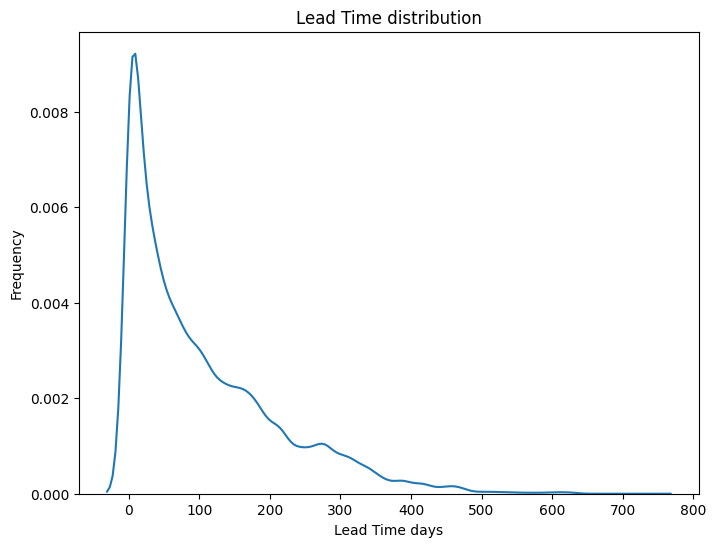

In [20]:
#Numerical variables
#Histogram for a numerical variable
plt.figure(figsize=(8, 6))
sns.kdeplot(data['lead_time'])
plt.title('Lead Time distribution')
plt.xlabel('Lead Time days')
plt.ylabel('Frequency')
plt.show()


We can see the graph is huge outlier in the lead time but we can conclude that some people might stay long.

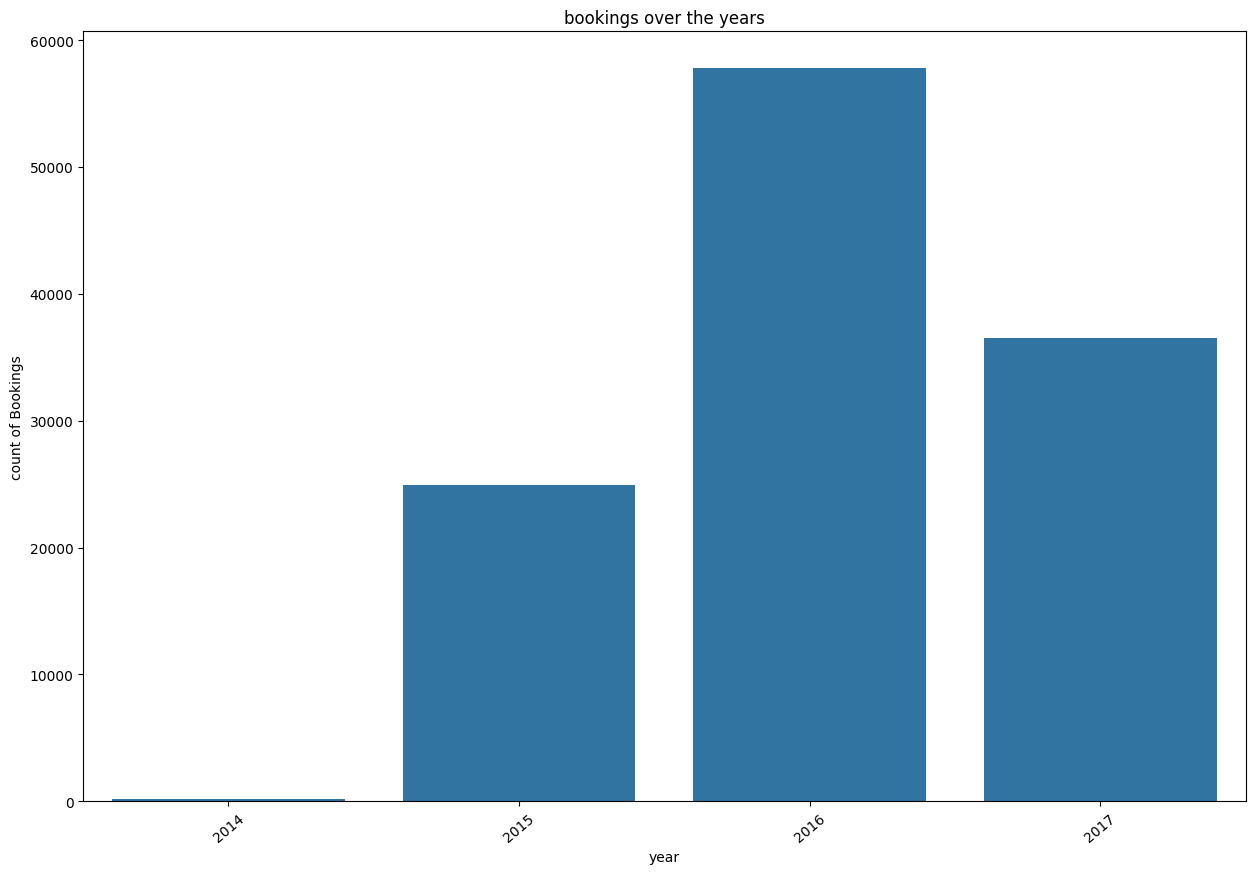

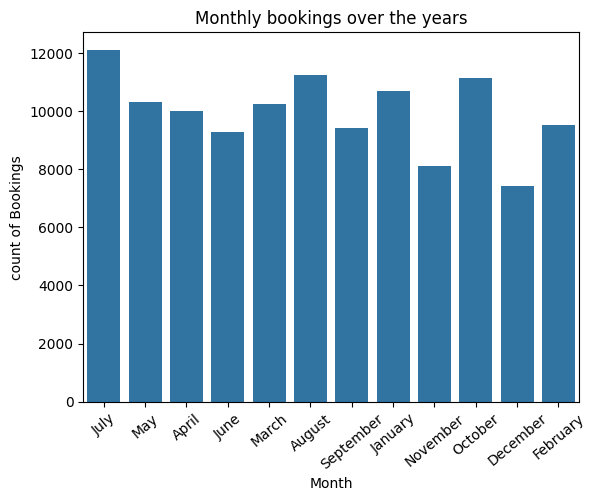

In [21]:
# year and month from reservation_status_date
data['year'] = data['reservation_status_date'].dt.year
data['month'] = data['reservation_status_date'].dt.month_name()

plt.figure(figsize=(15, 10))
#bookings per year
plt.subplot(1,1,1)
sns.countplot(x='year',data=data)
plt.title('bookings over the years')
plt.xlabel('year')
plt.ylabel('count of Bookings')
plt.xticks(rotation=40)
plt.show()

#bookings per month
plt.subplot(1,1,1)
sns.countplot(x='month',data=data)
plt.title('Monthly bookings over the years')
plt.xlabel('Month')
plt.ylabel('count of Bookings')
plt.xticks(rotation=40)
plt.show()


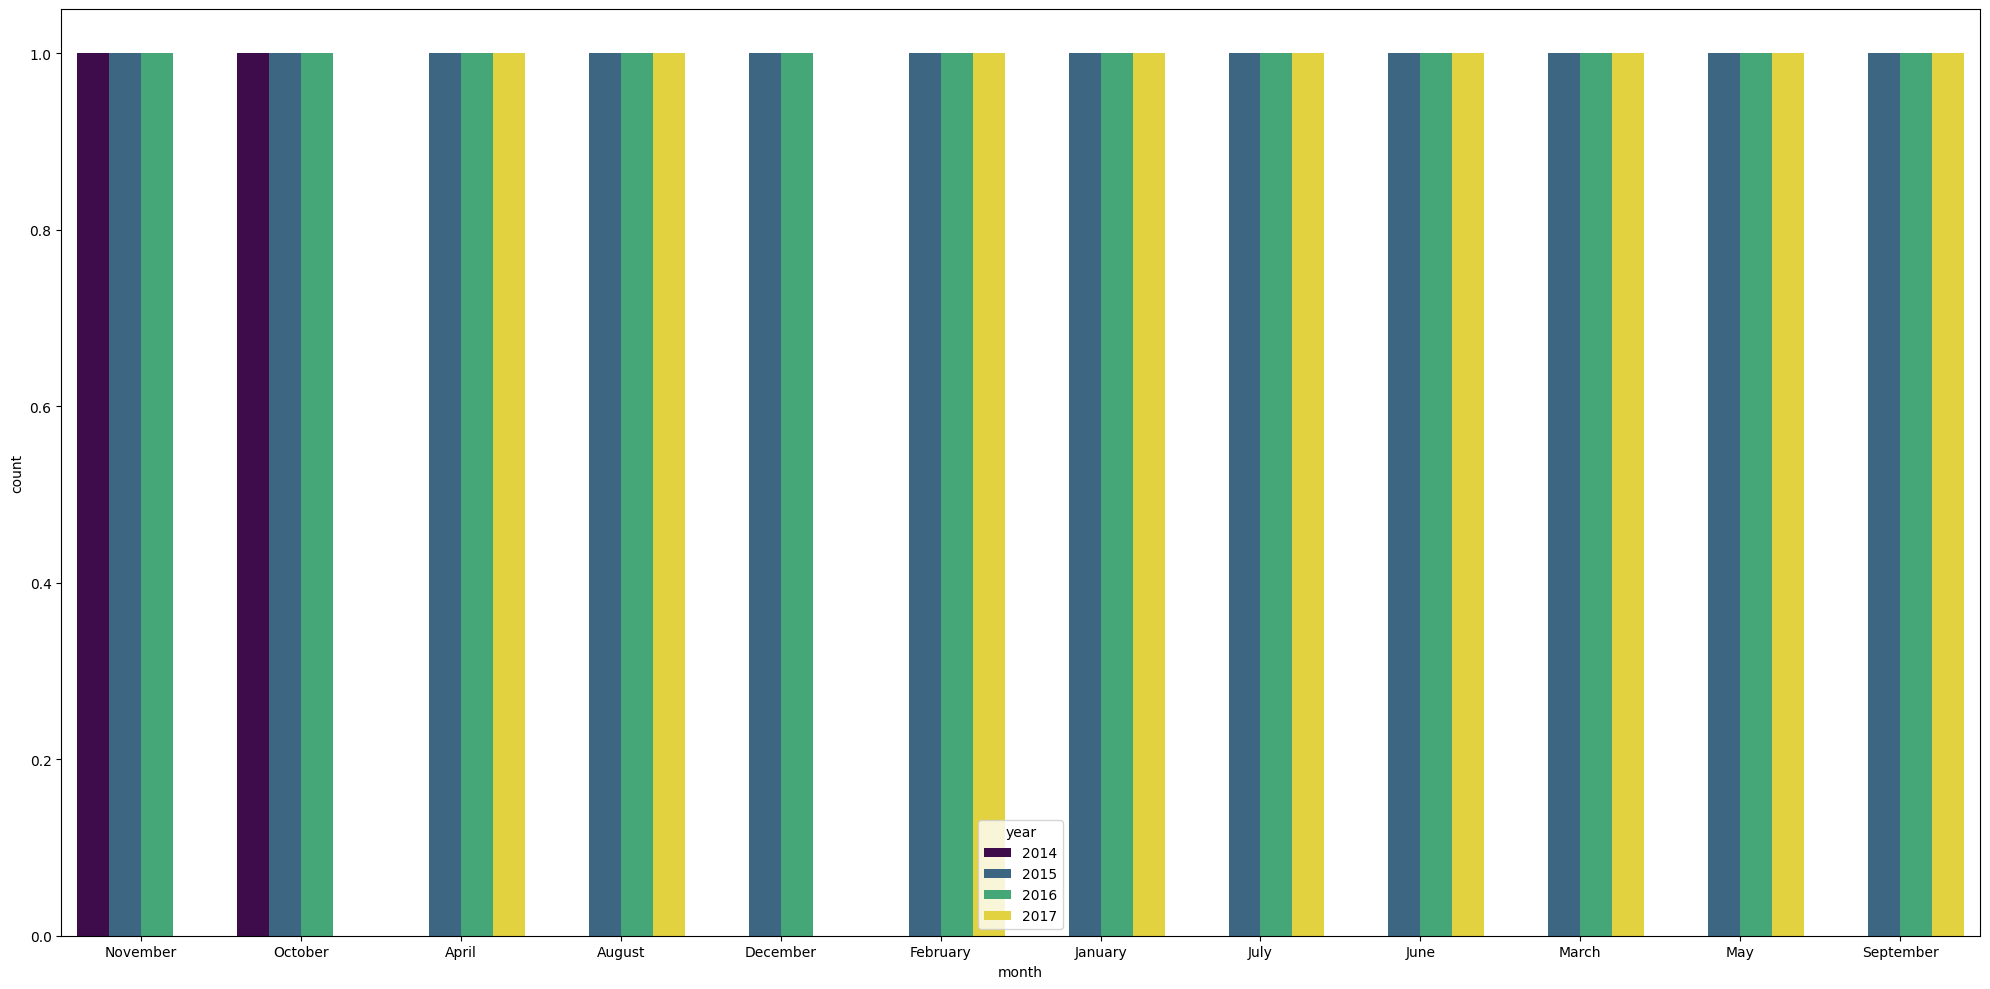

In [22]:
#booking trend by month over year
grouped_data=data.groupby(['year', 'month']).size().reset_index(name='count')
plt.figure(figsize=(20,10))
sns.countplot(data=grouped_data, x='month', hue='year', palette='viridis')
plt.tight_layout()
plt.show()

In [23]:
#Average daily trend

adr_ = data.groupby(['year','month'])['adr'].mean().unstack()
adr_


month       April      August   December    February    January        July  \
year                                                                          
2014          NaN         NaN        NaN         NaN        NaN         NaN   
2015    97.535364  113.315864  70.419366  102.926818  58.935506   91.647566   
2016    94.193013  138.397444  85.474232   81.971697  81.878608  124.223310   
2017   117.249514  162.217112        NaN   90.908697  95.658006  142.419411   

month        June      March         May   November    October   September  
year                                                                        
2014          NaN        NaN         NaN   0.000000  62.800000         NaN  
2015    89.392027  80.345294   89.881855  67.286100  75.900261  100.335439  
2016   109.911048  83.759440  101.002887  86.708002  96.109609  113.957436  
2017   128.254714  95.858931  121.919569        NaN        NaN  143.411170

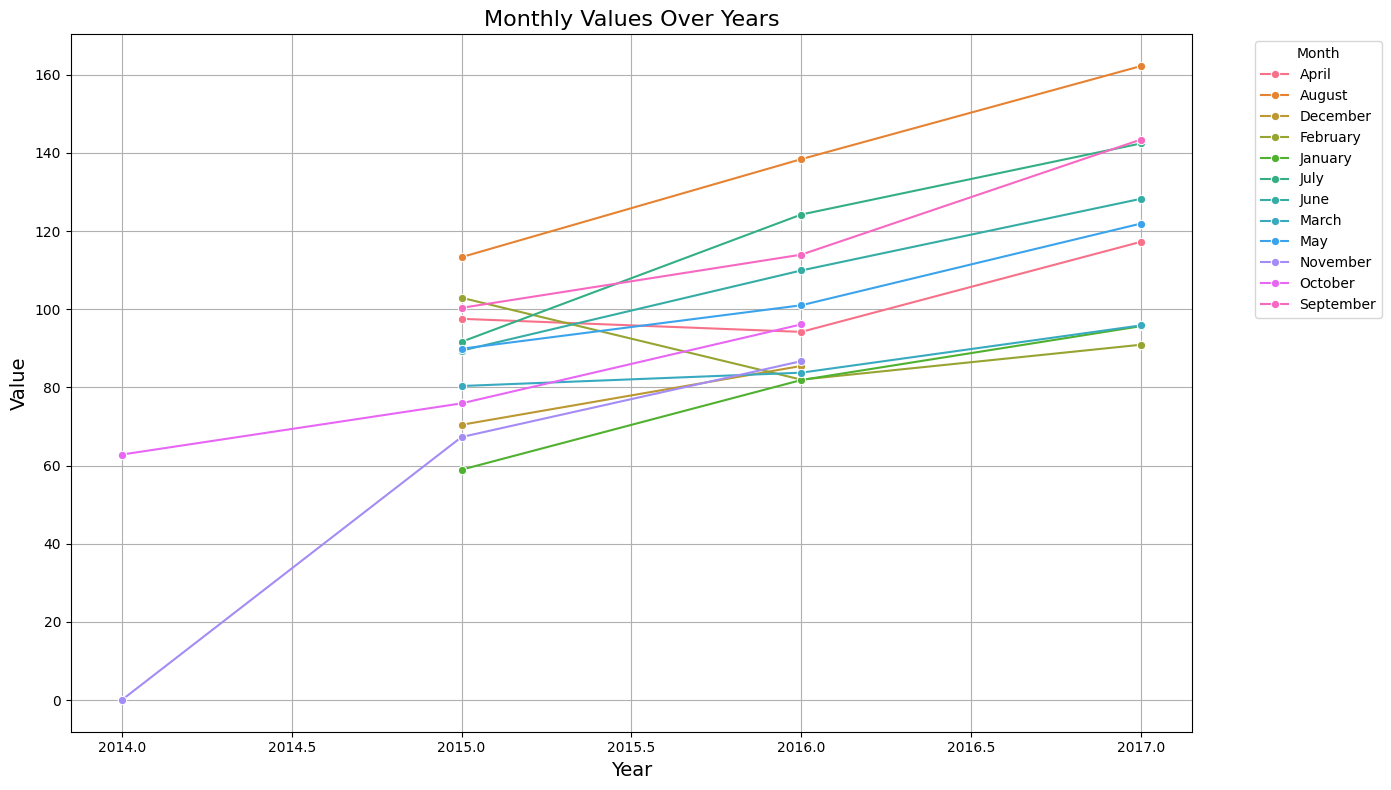

In [24]:
#Average daily trend
# taken the values from above for line plot
data_ = {
    'year': [2014, 2015, 2016, 2017],
    'April': [None, 97.535364, 94.193013, 117.249514],
    'August': [None, 113.315864, 138.397444, 162.217112],
    'December': [None, 70.419366, 85.474232, None],
    'February': [None, 102.926818, 81.971697, 90.908697],
    'January': [None, 58.935506, 81.878608, 95.658006],
    'July': [None, 91.647566, 124.223310, 142.419411],
    'June': [None, 89.392027, 109.911048, 128.254714],
    'March': [None, 80.345294, 83.759440, 95.858931],
    'May': [None, 89.881855, 101.002887, 121.919569],
    'November': [0.000000, 67.286100, 86.708002, None],
    'October': [62.800000, 75.900261, 96.109609, None],
    'September': [None, 100.335439, 113.957436, 143.411170]
}

adr_df=pd.DataFrame(data_)

#year as index
adr_df.set_index('year', inplace=True)

# reset index and melt DataFrame to long format
df_long = adr_df.reset_index().melt(id_vars='year', var_name='month', value_name='value')

#line plot to see trend
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_long, x='year', y='value', hue='month', marker='o')

#titles and labels
plt.title('Monthly Values Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.grid(True)

#show plots
plt.tight_layout()
plt.show()


In [25]:
df_long

year      month       value
0   2014      April         NaN
1   2015      April   97.535364
2   2016      April   94.193013
3   2017      April  117.249514
4   2014     August         NaN
5   2015     August  113.315864
6   2016     August  138.397444
7   2017     August  162.217112
8   2014   December         NaN
9   2015   December   70.419366
10  2016   December   85.474232
11  2017   December         NaN
12  2014   February         NaN
13  2015   February  102.926818
14  2016   February   81.971697
15  2017   February   90.908697
16  2014    January         NaN
17  2015    January   58.935506
18  2016    January   81.878608
19  2017    January   95.658006
20  2014       July         NaN
21  2015       July   91.647566
22  2016       July  124.223310
23  2017       July  142.419411
24  2014       June         NaN
25  2015       June   89.392027
26  2016       June  109.911048
27  2017       June  128.254714
28  2014      March         NaN
29  2015      March   80.345294
30  2016      March   83.759440
31  2017      March   95.858931
32  2014        May         NaN
33  2015        May   89.881855
34  2016        May  101.002887
35  2017        May  121.919569
36  2014   November    0.000000
37  2015   November   67.286100
38  2016   November   86.708002
39  2017   November         NaN
40  2014    October   62.800000
41  2015    October   75.900261
42  2016    October   96.109609
43  2017    October         NaN
44  2014  September         NaN
45  2015  September  100.335439
46  2016  September  113.957436
47  2017  September  143.411170

**We can see a good trend in 2016 and in the month of august adr was high**

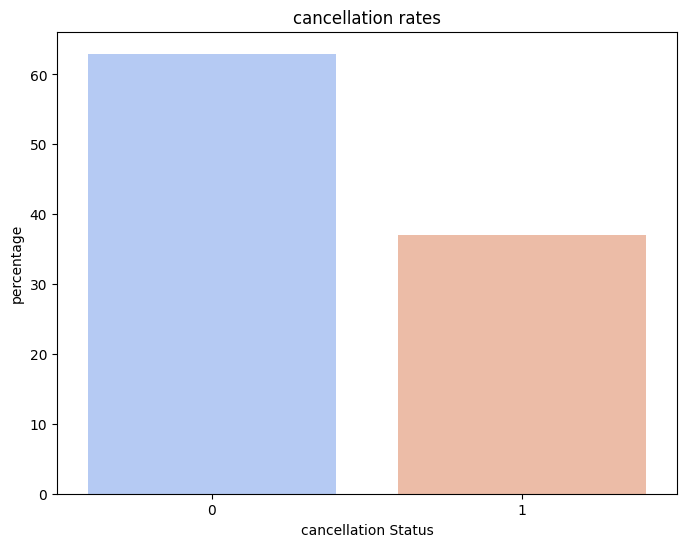

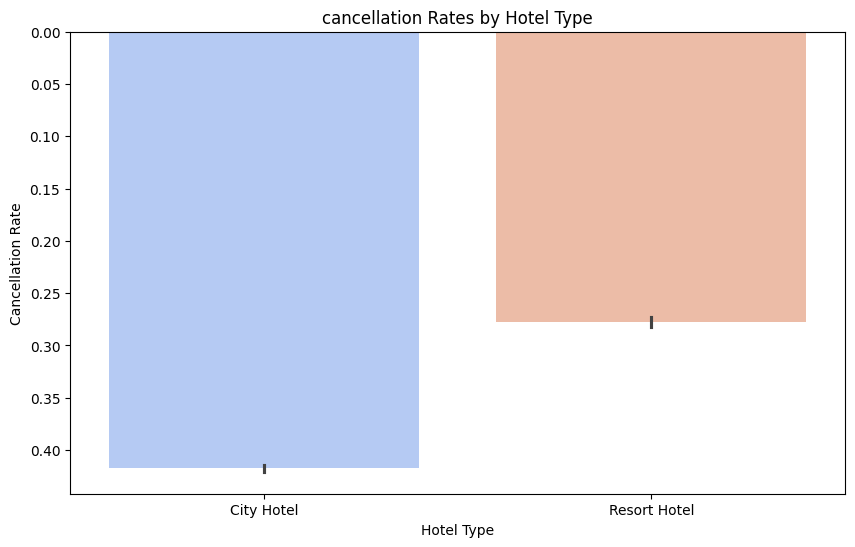

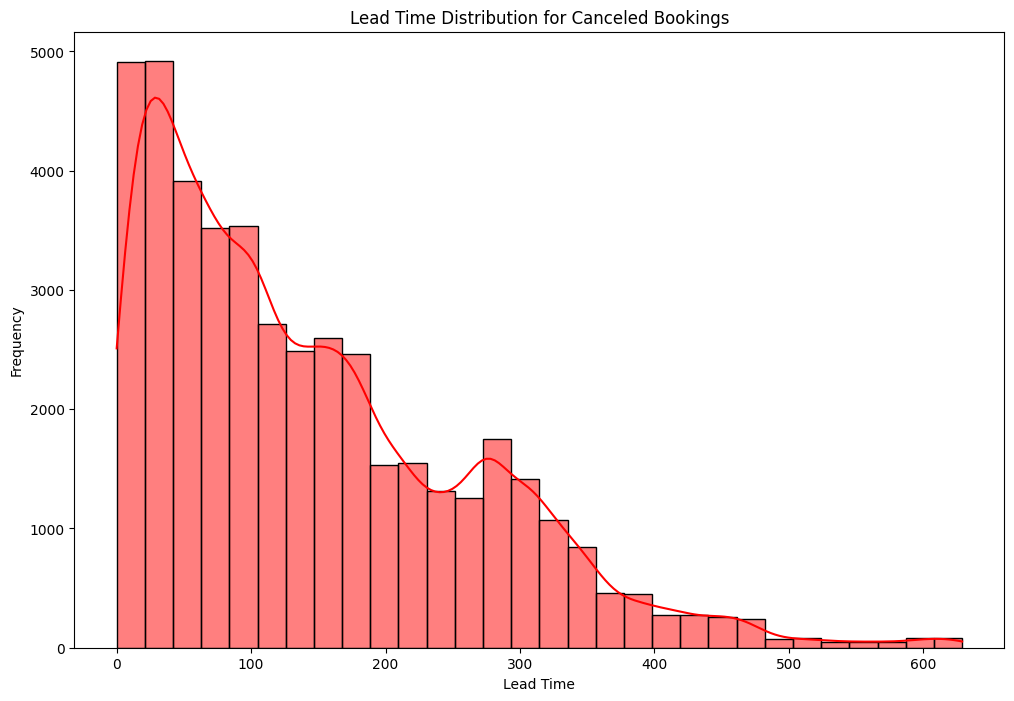

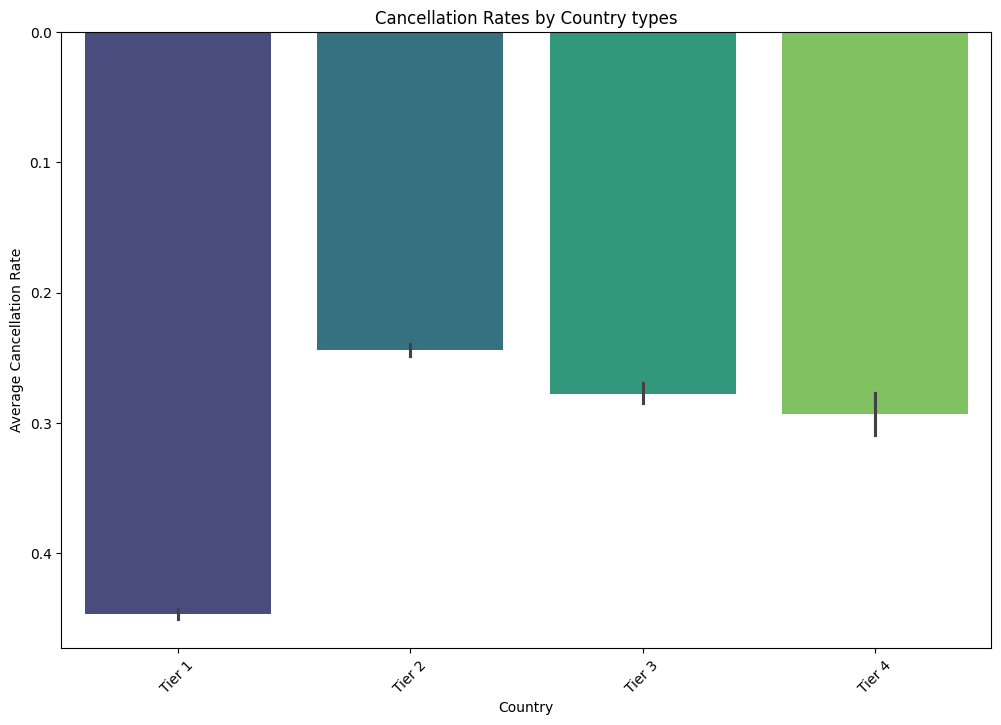

In [26]:
#cancellation rates
cancellation = data['is_canceled'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=cancellation.index, y=cancellation.values, palette='coolwarm')
plt.title('cancellation rates')
plt.xlabel('cancellation Status')
plt.ylabel('percentage')
plt.show()
#--------------------------------------------------------------------------------

#cancellation rates by hotel type
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='hotel', y='is_canceled', estimator='mean', palette='coolwarm')
plt.title('cancellation Rates by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')
plt.show()
#--------------------------------------------------------------------------------
#cancellation rates by lead time
plt.figure(figsize=(12, 8))
sns.histplot(data[data['is_canceled'] == 1]['lead_time'], bins=30, kde=True, color='red')
plt.title('Lead Time Distribution for Canceled Bookings')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()
#--------------------------------------------------------------------------------
#cancellation rates by country
plt.figure(figsize=(12, 8))
sns.barplot(data=data, x='country', y='is_canceled', estimator='mean', palette='viridis')
plt.title('Cancellation Rates by Country types')
plt.xlabel('Country')
plt.ylabel('Average Cancellation Rate')
plt.xticks(rotation=45)
plt.show()


**Conclusion**
1.Higher cancellation cates for City Hotels:

City hotels indicates that they have a higher average cancellation rate compared to Resort hotels.
This means a larger proportion of bookings at city hotels are canceled.

2.Trend of cancellation by lead time:

Most canceled bookings occur with shorter lead times. The histogram shows that the frequency of cancellations decreases as the lead time increases, indicating that early bookings are less likely to be canceled.

3.Most of the cancellation was do by tier1 countries.


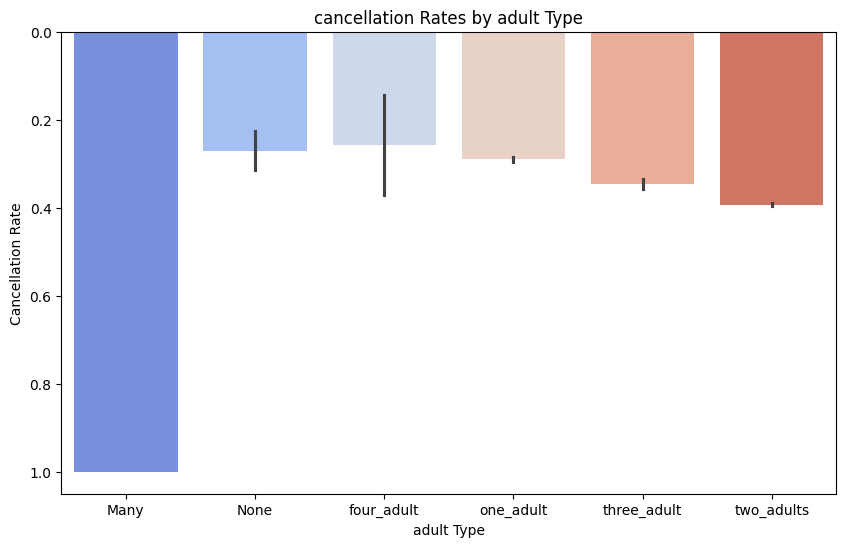

In [27]:
#customer demograhpis
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='adults', y='is_canceled', estimator='mean', palette='coolwarm')
plt.title('cancellation Rates by adult Type')
plt.xlabel('adult Type')
plt.ylabel('Cancellation Rate')
plt.show()


** We can see that the  customers count is more then 5 are more likely to cancel the booking**


**Hypothesis testing**
#1.Customers booking more than 6 months in advance are more likely to cancel.
#2. Weekday bookings have a higher average daily rate (ADR) than weekend bookings.

In [28]:
#Hypothesis first
#Null Hypothesis ho: No significant relation between cancellation rates and bookings made more than 6 months in advance and those made less than or equal to 6 months in advance.

#Alternative Hypothesis h1: Customers booking more than 6 months in advance are more likely to cancel.

data['advanced_booking'] = data['lead_time'].apply(lambda x: 6 if x > 180 else 0)
cancellation= data.groupby('advanced_booking')
cancellation[['advanced_booking','is_canceled']]

#chi sqaure test to check the p value
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['advanced_booking'], data['is_canceled'])

# Perform Chi-Square Test
chi2, p, dof, ex = chi2_contingency(contingency_table)

#results
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{ex}")



Chi2 Statistic: 5321.73290110073
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies Table:
[[59620.31885418 35077.68114582]
 [15545.68114582  9146.31885418]]


In [29]:
#hence p value is less then 0.05


**Hence the p-value is less than 0.05, we reject the null hypothesis and conclude that bookings made more than 6 months in advance have a higher cancellation rate.**

In [30]:
#Hypothesis 2: Weekday bookings have a higher average daily rate (ADR) than weekend bookings.


#Null Hypothesis (H0): There is no difference in ADR between weekday and weekend bookings.
#Alternative Hypothesis (H1): Weekday bookings have a higher ADR than weekend bookings.

In [31]:
#extracting week day name
data['day_of_week'] = data['reservation_status_date'].dt.day_name()
data['booking_day'] = data['day_of_week'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')
#average adr
adr_by_day = data.groupby('booking_day')['adr'].mean()
#ADR
weekday_adr = data[data['booking_day'] == 'Weekday']['adr']
weekend_adr = data[data['booking_day'] == 'Weekend']['adr']

# t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(weekday_adr, weekend_adr)
print(f'T-statistic: {t_stat}, P-value: {p_value}')



T-statistic: -15.206866062360545, P-value: 3.56448899560107e-52


 **p-value of
3.56448899560107
×
1
0
−
52
3.56448899560107×10
−52**

1.Weekday bookings have a higher ADR than weekend bookings.



In [32]:
#labelling the categorical variables
from sklearn.preprocessing import LabelEncoder

categorical_columns=['hotel','arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest',
        'reserved_room_type','previous_bookings_not_canceled',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company','customer_type',
       'required_car_parking_spaces',
       'reservation_status','continent', 'year',
       'month', 'advanced_booking', 'day_of_week', 'booking_day']
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

data=data.drop('reservation_status_date',axis=1)

In [33]:
#logistics regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#train test split
from sklearn.model_selection import train_test_split
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=90)
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# predictions
lr_predictions = lr_model.predict(X_test_scaled)

#report
print("Logistic Regression (Scaled):")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Precision:", precision_score(y_test, lr_predictions))
print("Recall:", recall_score(y_test, lr_predictions))
print("F1 Score:", f1_score(y_test, lr_predictions))

Logistic Regression (Scaled):
Accuracy: 0.989558031102549
Precision: 0.9998432970304787
Recall: 0.971674407979898
F1 Score: 0.9855576150756874


**Logistic Regression (Scaled):
Accuracy: 0.989558031102549
Precision: 0.9998432970304787
Recall: 0.971674407979898
F1 Score: 0.9855576150756874**
# Hence Our logistice regiression is performing well and f1 score is 0.9855

In [37]:
#Random forest with gridsearch cv to get better parameter for model and deploy
#parameter grid
param_grid_rf = {
    'n_estimators': [100,200],
    'min_samples_split':[5,10]
}

#importing library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

#parameters and score
print("parameters rf:", grid_search_rf.best_params_)
print("score for rf:", grid_search_rf.best_score_)
#best model
best_rf_model = grid_search_rf.best_estimator_
#score
rf_best_predictions = best_rf_model.predict(X_test_scaled)

#scores
accuracy = accuracy_score(y_test, rf_best_predictions)
print("Accuracy:", accuracy)

parameters rf: {'min_samples_split': 10, 'n_estimators': 200}
score for rf: 0.9999641040981155
Accuracy: 0.9999720802970656


**Our random forest is perofroming better then logistic regression**
#Accuracy score is 0.99

In [40]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = best_rf_model.predict(X_test_scaled)  # Replace with your prediction code


cm = confusion_matrix(y_test, y_pred)

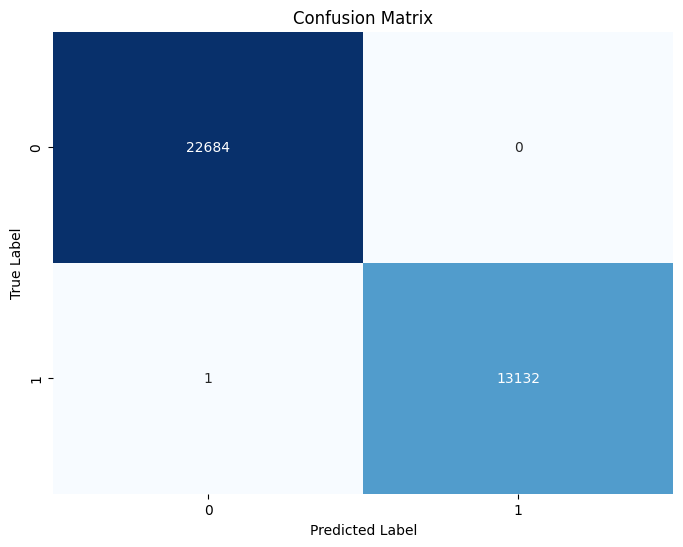

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()